In [336]:
import pandas as pd

In [337]:
# Load preprocessed data
df_preprocessed = pd.read_csv('../data/processed/new_dht11_preprocessed.csv')

# Display first few rows of the data
df_preprocessed.head()

,datatime,temperature,humidity,mq2_analog,mq2_digital,sound_analog,sound_digital,mq9_analog,mq9_digital,mq8_analog,mq8_digital,pm25_density,pm10_density,manual_anomaly,anomaly_isolation_forest,anomaly_lstm,combined_anomaly,anomaly_duration
0,2024-04-06 22:39:11,32.3,53.0,148.0,1.0,192.0,0.0,141.0,1.0,205.0,1.0,242.28,186.67,1,1,NaN,1,0.0
1,2024-04-06 22:39:18,32.3,53.0,148.0,1.0,184.0,0.0,141.0,1.0,205.0,1.0,233.98,189.99,1,1,NaN,1,0.0
2,2024-04-06 22:39:24,32.3,53.0,148.0,1.0,189.0,0.0,141.0,1.0,205.0,1.0,246.43,212.40,1,1,NaN,1,0.0
3,2024-04-06 22:39:31,32.3,53.0,147.0,1.0,189.0,0.0,141.0,1.0,205.0,1.0,234.81,183.35,1,1,NaN,1,0.0
4,2024-04-06 22:39:38,32.3,53.0,147.0,1.0,184.0,0.0,141.0,1.0,205.0,1.0,237.30,221.53,1,1,NaN,1,0.0


In [338]:
# # Convert 'datatime' from milliseconds to datetime
# df_preprocessed['datatime'] = pd.to_datetime(df_preprocessed['datatime'], unit='ms', errors='coerce')

# # Convert the datetime object to Unix timestamp (seconds since epoch)
# df_preprocessed['datatime'] = df_preprocessed['datatime'].apply(lambda x: x.timestamp() if pd.notnull(x) else None)


In [339]:
df_preprocessed

,datatime,temperature,humidity,mq2_analog,mq2_digital,sound_analog,sound_digital,mq9_analog,mq9_digital,mq8_analog,mq8_digital,pm25_density,pm10_density,manual_anomaly,anomaly_isolation_forest,anomaly_lstm,combined_anomaly,anomaly_duration
0,2024-04-06 22:39:11,32.3,53.0,148.0,1.0,192.0,0.0,141.0,1.0,205.0,1.0,242.28,186.67,1,1,NaN,1,0.0
1,2024-04-06 22:39:18,32.3,53.0,148.0,1.0,184.0,0.0,141.0,1.0,205.0,1.0,233.98,189.99,1,1,NaN,1,0.0
2,2024-04-06 22:39:24,32.3,53.0,148.0,1.0,189.0,0.0,141.0,1.0,205.0,1.0,246.43,212.40,1,1,NaN,1,0.0
3,2024-04-06 22:39:31,32.3,53.0,147.0,1.0,189.0,0.0,141.0,1.0,205.0,1.0,234.81,183.35,1,1,NaN,1,0.0
4,2024-04-06 22:39:38,32.3,53.0,147.0,1.0,184.0,0.0,141.0,1.0,205.0,1.0,237.30,221.53,1,1,NaN,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60914,2024-11-23 13:45:10,33.3,36.0,47.0,1.0,138.0,0.0,198.0,1.0,105.0,1.0,209.91,122.75,1,1,1.0,1,0.0
60915,2024-11-23 13:45:16,33.3,36.0,47.0,1.0,134.0,0.0,197.0,1.0,104.0,1.0,219.04,126.90,1,1,1.0,1,0.0
60916,2024-11-23 13:45:23,33.3,36.0,47.0,1.0,138.0,0.0,198.0,1.0,104.0,1.0,211.57,131.05,1,1,1.0,1,0.0
60917,2024-11-23 13:45:30,33.3,36.0,47.0,1.0,140.0,0.0,198.0,1.0,104.0,1.0,205.76,117.77,1,1,1.0,1,0.0


In [340]:
#Step 1: Feature Engineering
sensor_columns = ['temperature', 'humidity', 'mq2_analog', 'mq9_analog', 'sound_analog', 'pm25_density', 'pm10_density']
# df_preprocessed['datatime'] = pd.to_datetime(df_preprocessed['datatime'], unit='s')


In [341]:
# Calculate differences and rolling averages
for col in sensor_columns:
    df_preprocessed[f'{col}_diff'] = df_preprocessed[col].diff()
    df_preprocessed[f'{col}_rolling_avg'] = df_preprocessed[col].rolling(window=5).mean()


In [342]:
# Calculate anomaly duration
# df_preprocessed['anomaly_duration'] = df_preprocessed['datatime'].diff().dt.total_seconds().fillna(0)


In [343]:
# Calculate severity (normalized deviation)
for col in sensor_columns:
    normal_mean = df_preprocessed[df_preprocessed['combined_anomaly'] == 1][col].mean()
    normal_std = df_preprocessed[df_preprocessed['combined_anomaly'] == 1][col].std()
    df_preprocessed[f'{col}_severity'] = (df_preprocessed[col] - normal_mean) / normal_std


In [344]:
# Compute pairwise correlations
corr_matrix = df_preprocessed[sensor_columns].corr()

# Identify strongly correlated sensor pairs (excluding self-pairs)
strong_pairs = [(col1, col2) for col1 in sensor_columns for col2 in sensor_columns
                if corr_matrix.loc[col1, col2] > 0.2 and col1 != col2]

# Initialize a list to hold correlation scores for each row
correlation_scores = []

# Iterate over the strong sensor pairs and compute agreement in changes
for col1, col2 in strong_pairs:
    # Calculate whether both sensors increase or decrease together
    agreement = ((df_preprocessed[f'{col1}_diff'] > 0) & (df_preprocessed[f'{col2}_diff'] > 0)) | \
                ((df_preprocessed[f'{col1}_diff'] < 0) & (df_preprocessed[f'{col2}_diff'] < 0))
    
    # Append the boolean agreement as integers (1 for agreement, 0 otherwise)
    correlation_scores.append(agreement.astype(int))

df_preprocessed['correlation_behavior'] = pd.DataFrame(correlation_scores).sum(axis=0) / len(strong_pairs)



In [345]:
print(df_preprocessed['correlation_behavior'].value_counts())

correlation_behavior
0.2    26752
0.4    13875
0.0    12865
0.6     3777
0.8     3634
1.0       16
Name: count, dtype: int64


In [346]:
strong_pairs

[('temperature', 'humidity'),
 ('humidity', 'temperature'),
 ('mq2_analog', 'mq9_analog'),
 ('mq2_analog', 'sound_analog'),
 ('mq9_analog', 'mq2_analog'),
 ('mq9_analog', 'sound_analog'),
 ('sound_analog', 'mq2_analog'),
 ('sound_analog', 'mq9_analog'),
 ('pm25_density', 'pm10_density'),
 ('pm10_density', 'pm25_density')]

In [347]:
df_preprocessed

,datatime,temperature,humidity,mq2_analog,mq2_digital,sound_analog,sound_digital,mq9_analog,mq9_digital,mq8_analog,...,pm10_density_diff,pm10_density_rolling_avg,temperature_severity,humidity_severity,mq2_analog_severity,mq9_analog_severity,sound_analog_severity,pm25_density_severity,pm10_density_severity,correlation_behavior
0,2024-04-06 22:39:11,32.3,53.0,148.0,1.0,192.0,0.0,141.0,1.0,205.0,...,NaN,NaN,0.251098,0.840708,3.636019,-1.607449,2.496513,0.258002,-0.031014,0.0
1,2024-04-06 22:39:18,32.3,53.0,148.0,1.0,184.0,0.0,141.0,1.0,205.0,...,3.32,NaN,0.251098,0.840708,3.636019,-1.607449,2.119943,0.015933,0.066651,0.0
2,2024-04-06 22:39:24,32.3,53.0,148.0,1.0,189.0,0.0,141.0,1.0,205.0,...,22.41,NaN,0.251098,0.840708,3.636019,-1.607449,2.355299,0.379037,0.725890,0.2
3,2024-04-06 22:39:31,32.3,53.0,147.0,1.0,189.0,0.0,141.0,1.0,205.0,...,-29.05,NaN,0.251098,0.840708,3.598832,-1.607449,2.355299,0.040140,-0.128679,0.2
4,2024-04-06 22:39:38,32.3,53.0,147.0,1.0,184.0,0.0,141.0,1.0,205.0,...,38.18,198.788,0.251098,0.840708,3.598832,-1.607449,2.119943,0.112761,0.994468,0.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60914,2024-11-23 13:45:10,33.3,36.0,47.0,1.0,138.0,0.0,198.0,1.0,105.0,...,3.32,123.580,0.692651,-1.181824,-0.119841,-0.003921,-0.045336,-0.686067,-1.911359,0.0
60915,2024-11-23 13:45:16,33.3,36.0,47.0,1.0,134.0,0.0,197.0,1.0,104.0,...,4.15,124.244,0.692651,-1.181824,-0.119841,-0.032053,-0.233621,-0.419791,-1.789278,0.4
60916,2024-11-23 13:45:23,33.3,36.0,47.0,1.0,138.0,0.0,198.0,1.0,104.0,...,4.15,126.070,0.692651,-1.181824,-0.119841,-0.003921,-0.045336,-0.637654,-1.667197,0.2
60917,2024-11-23 13:45:30,33.3,36.0,47.0,1.0,140.0,0.0,198.0,1.0,104.0,...,-13.28,123.580,0.692651,-1.181824,-0.119841,-0.003921,0.048806,-0.807102,-2.057857,0.2


In [348]:

# Step 4: Weighted Scoring - Assign weights to different features
weights = {
    'trend_features': 0.3,
    'anomaly_duration': 0.2,
    'severity': 0.3,
    'correlation_behavior': 0.2,
}

from sklearn.preprocessing import MinMaxScaler

# Define the features to normalize
features_to_normalize = {
    'trend_features': [f'{col}_diff' for col in sensor_columns],
    'anomaly_duration': ['anomaly_duration'],
    'severity': [f'{col}_severity' for col in sensor_columns],
    'correlation_behavior': ['correlation_behavior']
}

# Initialize scaler
scaler = MinMaxScaler()

# Normalize each feature group and create new normalized columns
for feature_group, columns in features_to_normalize.items():
    # Normalize and add '_normalized' suffix
    df_preprocessed[[f'{col}_normalized' for col in columns]] = scaler.fit_transform(df_preprocessed[columns])

# Calculate weighted score using normalized columns
df_preprocessed['weighted_score'] = (
    weights['trend_features'] * df_preprocessed[[f'{col}_normalized' for col in features_to_normalize['trend_features']]].mean(axis=1) +
    weights['anomaly_duration'] * df_preprocessed['anomaly_duration_normalized'] +
    weights['severity'] * df_preprocessed[[f'{col}_normalized' for col in features_to_normalize['severity']]].mean(axis=1) +
    weights['correlation_behavior'] * df_preprocessed['correlation_behavior_normalized']
)


In [349]:
# Calculate thresholds dynamically for weighted_score
high_score_threshold = df_preprocessed['weighted_score'].quantile(0.9)  # Top 10% for Environmental Changes
mid_score_threshold = df_preprocessed['weighted_score'].quantile(0.5)  # Median for Fault

# Calculate thresholds dynamically for correlation_behavior
high_corr_threshold = df_preprocessed['correlation_behavior'].quantile(0.9)  # Top 10% for strong correlations
mid_corr_threshold = df_preprocessed['correlation_behavior'].quantile(0.5)  # Median for moderate correlations

# Refined classification function with dynamic thresholds and handling negative sensor data
def classify_with_dynamic_thresholds(row):
    # Flag negative values in sensor data as faults (if present)
    if any(val < 0 for val in row[['temperature', 'humidity', 'mq2_analog', 'sound_analog', 'mq9_analog', 'pm25_density', 'pm10_density']]):
        return "Fault"  # Flag as Fault if there are negative sensor readings
    
    # If combined anomaly is 1, classify as Normal
    if row['combined_anomaly'] == 1:
        return "Normal"
    
    # Classification based on dynamic thresholds for anomaly data (combined_anomaly == -1)
    if row['combined_anomaly'] == -1:
        # Apply threshold logic to decide if it is an "Environmental Change" or "Fault"
        if row['weighted_score'] > high_score_threshold and row['correlation_behavior'] > high_corr_threshold:
            return "Environmental Changes"  # High score and high correlation indicates environmental changes
        else:
            return "Fault" 
    return "Normal" 

# Apply the classification function to the dataframe
df_preprocessed['anomaly_class'] = df_preprocessed.apply(classify_with_dynamic_thresholds, axis=1)

# Print the unique values and their counts in the 'anomaly_class' column
print(df_preprocessed['anomaly_class'].value_counts())


anomaly_class
Normal                   53909
Fault                     6727
Environmental Changes      283
Name: count, dtype: int64


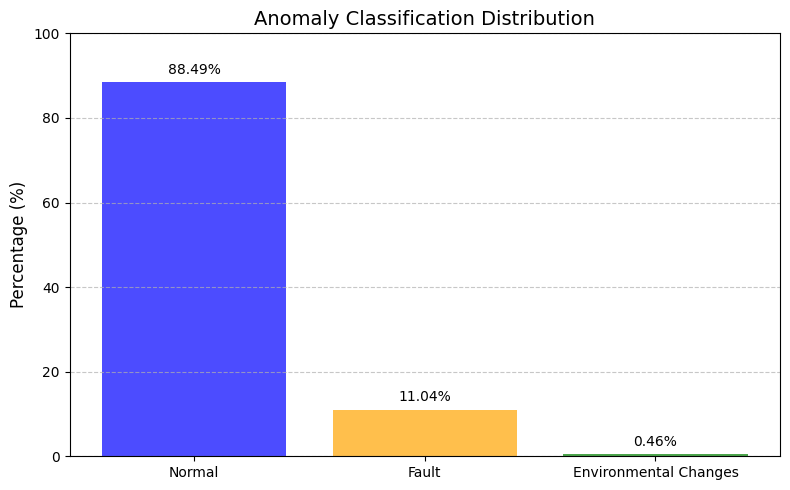

In [350]:
import matplotlib.pyplot as plt

# Calculate the percentage of each class in the 'anomaly_class' column
class_counts = df_preprocessed['anomaly_class'].value_counts()
total_rows = len(df_preprocessed)
class_percentages = (class_counts / total_rows) * 100

# Data for visualization
categories = class_percentages.index
values = class_percentages.values

# Create a bar plot
plt.figure(figsize=(8, 5))
plt.bar(categories, values, color=['blue', 'orange', 'green'], alpha=0.7)
plt.title('Anomaly Classification Distribution', fontsize=14)
plt.ylabel('Percentage (%)', fontsize=12)
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Annotate values on the bars
for i, v in enumerate(values):
    plt.text(i, v + 2, f"{v:.2f}%", ha='center', fontsize=10, color='black')

plt.tight_layout()
plt.show()


In [351]:
# Output: Preview the dataset with new anomaly classifications
df_preprocessed[['weighted_score','correlation_behavior', 'anomaly_class']].head(20)

,weighted_score,correlation_behavior,anomaly_class
0,NaN,0.0,Normal
1,0.262324,0.0,Normal
2,0.306295,0.2,Normal
3,0.301294,0.2,Normal
4,0.305803,0.2,Normal
5,0.380367,0.4,Normal
6,0.288641,0.2,Normal
7,0.302213,0.2,Normal
8,0.304801,0.2,Normal
9,0.345461,0.4,Normal


In [352]:
print(df_preprocessed['weighted_score'].describe())
print(df_preprocessed['correlation_behavior'].describe())


count    60918.000000
mean         0.308711
std          0.047690
min          0.186819
25%          0.285916
50%          0.297986
75%          0.334850
max          0.772497
Name: weighted_score, dtype: float64
count    60919.000000
mean         0.264118
std          0.212157
min          0.000000
25%          0.200000
50%          0.200000
75%          0.400000
max          1.000000
Name: correlation_behavior, dtype: float64


In [353]:
df_preprocessed.to_csv("../data/processed/classification_dht11_preprocessed.csv", index=False)

In [354]:
df_preprocessed

,datatime,temperature,humidity,mq2_analog,mq2_digital,sound_analog,sound_digital,mq9_analog,mq9_digital,mq8_analog,...,temperature_severity_normalized,humidity_severity_normalized,mq2_analog_severity_normalized,mq9_analog_severity_normalized,sound_analog_severity_normalized,pm25_density_severity_normalized,pm10_density_severity_normalized,correlation_behavior_normalized,weighted_score,anomaly_class
0,2024-04-06 22:39:11,32.3,53.0,148.0,1.0,192.0,0.0,141.0,1.0,205.0,...,0.859797,0.638554,0.145240,0.221003,0.244586,0.285432,0.231008,0.0,NaN,Normal
1,2024-04-06 22:39:18,32.3,53.0,148.0,1.0,184.0,0.0,141.0,1.0,205.0,...,0.859797,0.638554,0.145240,0.221003,0.234395,0.275657,0.235114,0.0,0.262324,Normal
2,2024-04-06 22:39:24,32.3,53.0,148.0,1.0,189.0,0.0,141.0,1.0,205.0,...,0.859797,0.638554,0.145240,0.221003,0.240764,0.290319,0.262832,0.2,0.306295,Normal
3,2024-04-06 22:39:31,32.3,53.0,147.0,1.0,189.0,0.0,141.0,1.0,205.0,...,0.859797,0.638554,0.144259,0.221003,0.240764,0.276635,0.226902,0.2,0.301294,Normal
4,2024-04-06 22:39:38,32.3,53.0,147.0,1.0,184.0,0.0,141.0,1.0,205.0,...,0.859797,0.638554,0.144259,0.221003,0.234395,0.279567,0.274125,0.2,0.305803,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60914,2024-11-23 13:45:10,33.3,36.0,47.0,1.0,138.0,0.0,198.0,1.0,105.0,...,0.876689,0.433735,0.046124,0.310345,0.175796,0.247312,0.151948,0.0,0.247023,Normal
60915,2024-11-23 13:45:16,33.3,36.0,47.0,1.0,134.0,0.0,197.0,1.0,104.0,...,0.876689,0.433735,0.046124,0.308777,0.170701,0.258064,0.157081,0.4,0.327733,Normal
60916,2024-11-23 13:45:23,33.3,36.0,47.0,1.0,138.0,0.0,198.0,1.0,104.0,...,0.876689,0.433735,0.046124,0.310345,0.175796,0.249267,0.162214,0.2,0.287616,Normal
60917,2024-11-23 13:45:30,33.3,36.0,47.0,1.0,140.0,0.0,198.0,1.0,104.0,...,0.876689,0.433735,0.046124,0.310345,0.178344,0.242425,0.145788,0.2,0.286087,Normal


In [355]:
df_preprocessed.columns

Index(['datatime', 'temperature', 'humidity', 'mq2_analog', 'mq2_digital',
       'sound_analog', 'sound_digital', 'mq9_analog', 'mq9_digital',
       'mq8_analog', 'mq8_digital', 'pm25_density', 'pm10_density',
       'manual_anomaly', 'anomaly_isolation_forest', 'anomaly_lstm',
       'combined_anomaly', 'anomaly_duration', 'temperature_diff',
       'temperature_rolling_avg', 'humidity_diff', 'humidity_rolling_avg',
       'mq2_analog_diff', 'mq2_analog_rolling_avg', 'mq9_analog_diff',
       'mq9_analog_rolling_avg', 'sound_analog_diff',
       'sound_analog_rolling_avg', 'pm25_density_diff',
       'pm25_density_rolling_avg', 'pm10_density_diff',
       'pm10_density_rolling_avg', 'temperature_severity', 'humidity_severity',
       'mq2_analog_severity', 'mq9_analog_severity', 'sound_analog_severity',
       'pm25_density_severity', 'pm10_density_severity',
       'correlation_behavior', 'temperature_diff_normalized',
       'humidity_diff_normalized', 'mq2_analog_diff_normalized'

In [356]:
df_preprocessed['anomaly_duration'].describe()

count    6.091900e+04
mean     4.956214e+04
std      3.797078e+05
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      5.441245e+06
Name: anomaly_duration, dtype: float64

In [357]:
# Specify columns to retain: sensor data (excluding digital), weighted_score, correlation_behavior, anomaly_class
columns_to_save = [
    'temperature', 'humidity', 'mq2_analog', 'mq9_analog', 
    'sound_analog', 'pm25_density', 'pm10_density', 
    'weighted_score', 'correlation_behavior', 'anomaly_class'
]

# Filter the DataFrame to keep only the desired columns
df_filtered = df_preprocessed[columns_to_save]

# Save the filtered DataFrame to a new CSV file
df_filtered.to_csv('../data/processed/sensor_data_filtered.csv', index=False)

# Display confirmation
print("Filtered data saved to 'sensor_data_filtered.csv'.")


Filtered data saved to 'sensor_data_filtered.csv'.


In [358]:
# Select only normalized features used in scoring
cluster_features = [col for col in df_preprocessed.columns if col.endswith('_normalized')]



df_cluster_input = df_preprocessed[cluster_features].dropna()  # Drop NaNs if any exist


In [359]:
df_cluster_input

,temperature_diff_normalized,humidity_diff_normalized,mq2_analog_diff_normalized,mq9_analog_diff_normalized,sound_analog_diff_normalized,pm25_density_diff_normalized,pm10_density_diff_normalized,anomaly_duration_normalized,temperature_severity_normalized,humidity_severity_normalized,mq2_analog_severity_normalized,mq9_analog_severity_normalized,sound_analog_severity_normalized,pm25_density_severity_normalized,pm10_density_severity_normalized,correlation_behavior_normalized
1,0.590909,0.503106,0.472033,0.531422,0.478081,0.429718,0.505851,0.0,0.859797,0.638554,0.145240,0.221003,0.234395,0.275657,0.235114,0.0
2,0.590909,0.503106,0.472033,0.531422,0.488834,0.447925,0.520804,0.0,0.859797,0.638554,0.145240,0.221003,0.240764,0.290319,0.262832,0.2
3,0.590909,0.503106,0.471511,0.531422,0.484698,0.426805,0.480496,0.0,0.859797,0.638554,0.144259,0.221003,0.240764,0.276635,0.226902,0.2
4,0.590909,0.503106,0.472033,0.531422,0.480562,0.439186,0.533157,0.0,0.859797,0.638554,0.144259,0.221003,0.234395,0.279567,0.274125,0.2
5,0.590909,0.503106,0.472556,0.531422,0.488834,0.455936,0.804944,0.0,0.859797,0.638554,0.145240,0.221003,0.240764,0.304980,0.750513,0.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60914,0.590909,0.503106,0.472033,0.531422,0.483044,0.435544,0.505851,0.0,0.876689,0.433735,0.046124,0.310345,0.175796,0.247312,0.151948,0.0
60915,0.590909,0.503106,0.472033,0.530320,0.481390,0.445012,0.506501,0.0,0.876689,0.433735,0.046124,0.308777,0.170701,0.258064,0.157081,0.4
60916,0.590909,0.503106,0.472033,0.532525,0.488007,0.430447,0.506501,0.0,0.876689,0.433735,0.046124,0.310345,0.175796,0.249267,0.162214,0.2
60917,0.590909,0.503106,0.472033,0.531422,0.486352,0.431903,0.492849,0.0,0.876689,0.433735,0.046124,0.310345,0.178344,0.242425,0.145788,0.2


In [360]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Compute rolling std on the whole dataset (optional, if required in clustering)
for col in sensor_columns:
    df_preprocessed[f'{col}_rolling_std'] = df_preprocessed[col].rolling(window=5, min_periods=1).std()

# Select only anomalous data
anomalous_data = df_preprocessed[df_preprocessed['combined_anomaly'] == -1].copy()

# Define clustering features
cluster_features = [
    f'{col}_normalized' for col in features_to_normalize['trend_features']
] + [
    f'{col}_normalized' for col in features_to_normalize['severity']
] + [
    'anomaly_duration_normalized',
    'correlation_behavior_normalized'
]

# Clustering
k = 30
kmeans = KMeans(n_clusters=k, random_state=0)
anomalous_data['cluster'] = kmeans.fit_predict(anomalous_data[cluster_features])

# Map cluster labels to heuristic classes (majority vote)
mapping = {}
for c in range(k):
    cluster_data = anomalous_data[anomalous_data['cluster'] == c]['anomaly_class']
    fault_ratio = (cluster_data == 'Fault').mean()
    if fault_ratio > 0.6:
        mapping[c] = 'Fault'
    else:
        mapping[c] = 'Environmental Changes'


# Assign final label based on cluster
anomalous_data['cluster_mapped_class'] = anomalous_data['cluster'].map(mapping)

# Merge back into full dataset
df_preprocessed = df_preprocessed.merge(anomalous_data[['cluster', 'cluster_mapped_class']], left_index=True, right_index=True, how='left')


c:\Users\shiva\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [361]:
mapping # Add cluster assignments to the anomalous data
anomalous_data['cluster'] = kmeans.labels_

# See how many samples are in each cluster
print(anomalous_data['cluster'].value_counts())

# Crosstab to see distribution of true classes across clusters
cluster_crosstab = pd.crosstab(anomalous_data['cluster'], anomalous_data['anomaly_class'])
print(cluster_crosstab)


cluster
0     1075
7      707
17     695
12     680
1      607
16     440
29     295
8      232
3      201
9      198
24     191
2      183
11     176
5      150
26     141
21     138
6      120
4      117
25     109
14      85
10      77
20      76
28      72
18      70
19      53
22      43
13      41
27      16
23      15
15       7
Name: count, dtype: int64
anomaly_class  Environmental Changes  Fault
cluster                                    
0                                  0   1075
1                                  0    607
2                                  0    183
3                                  0    201
4                                 60     57
5                                  0    150
6                                 14    106
7                                  0    707
8                                  0    232
9                                  0    198
10                                 0     77
11                                 0    176
12                  

In [362]:
# from sklearn.cluster import DBSCAN

# db = DBSCAN(eps=0.5, min_samples=5)
# anomalous_data['cluster'] = db.fit_predict(anomalous_data[cluster_features])
# print(anomalous_data['cluster'].value_counts())


In [363]:
# pd.crosstab(anomalous_data['cluster'], anomalous_data['anomaly_class'])
# 

In [364]:
# Add a final label column in the full df
df_preprocessed['final_class'] = df_preprocessed['cluster_mapped_class']  # copied from clustering
df_preprocessed.loc[df_preprocessed['combined_anomaly'] == 1, 'final_class'] = 'Normal'  # set normal for non-anomalous rows

# Count how many of each final class
final_distribution = df_preprocessed['final_class'].value_counts()
print(final_distribution)


final_class
Normal                   53909
Fault                     6682
Environmental Changes      328
Name: count, dtype: int64


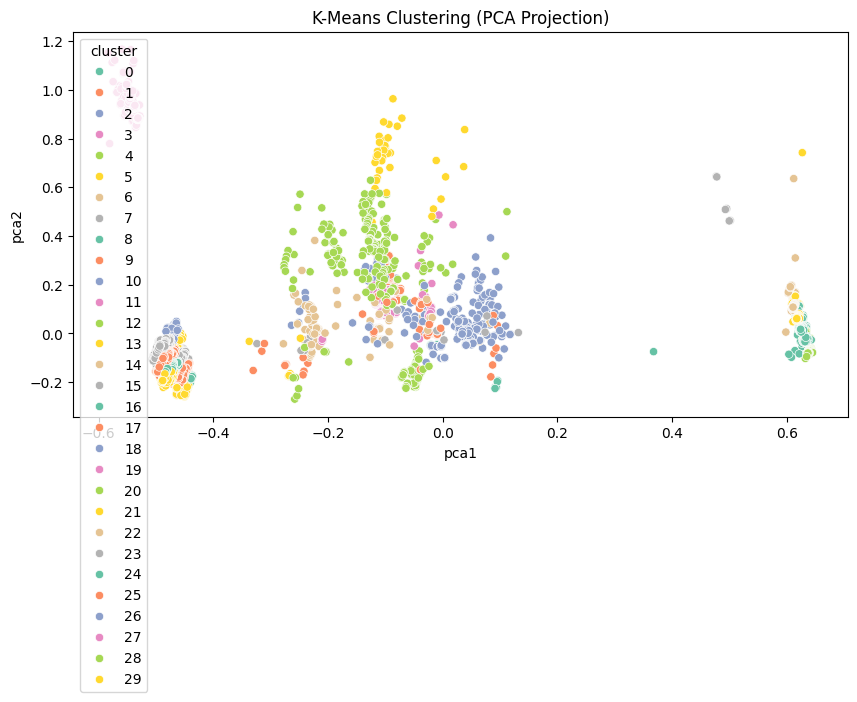

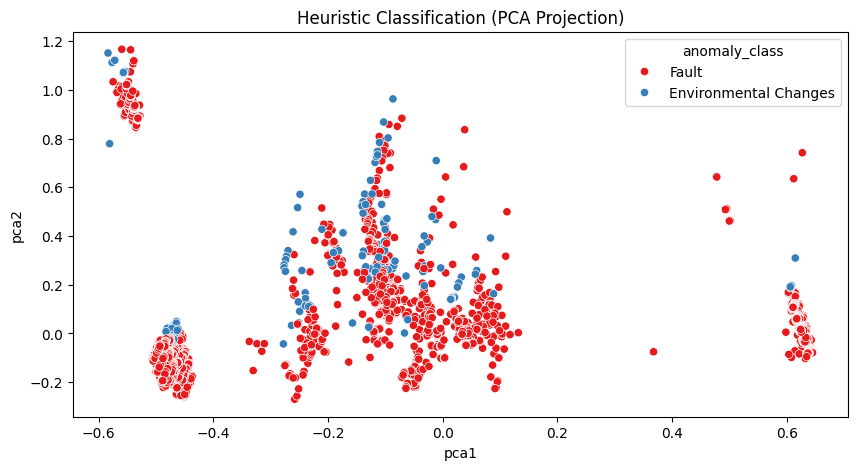

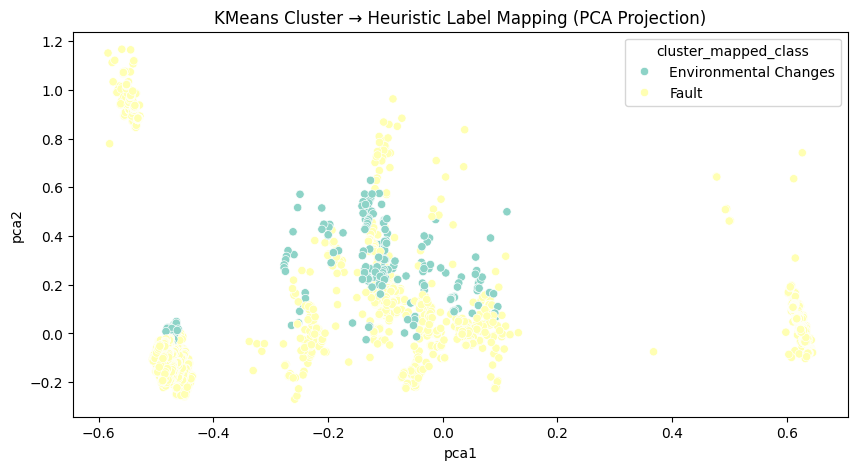

In [365]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Apply PCA for 2D projection
pca = PCA(n_components=2)
proj = pca.fit_transform(anomalous_data[cluster_features])
anomalous_data['pca1'] = proj[:, 0]
anomalous_data['pca2'] = proj[:, 1]

# Plot by KMeans cluster
plt.figure(figsize=(10, 5))
sns.scatterplot(data=anomalous_data, x='pca1', y='pca2', hue='cluster', palette='Set2')
plt.title("K-Means Clustering (PCA Projection)")
plt.show()

# Plot by Heuristic Label
plt.figure(figsize=(10, 5))
sns.scatterplot(data=anomalous_data, x='pca1', y='pca2', hue='anomaly_class', palette='Set1')
plt.title("Heuristic Classification (PCA Projection)")
plt.show()

# Plot by Cluster Mapped Class
plt.figure(figsize=(10, 5))
sns.scatterplot(data=anomalous_data, x='pca1', y='pca2', hue='cluster_mapped_class', palette='Set3')
plt.title("KMeans Cluster → Heuristic Label Mapping (PCA Projection)")
plt.show()


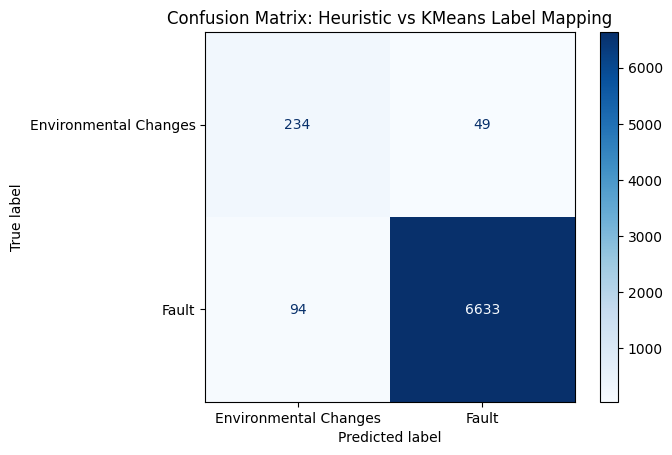

In [366]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(anomalous_data['anomaly_class'], anomalous_data['cluster_mapped_class'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Environmental Changes","Fault"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix: Heuristic vs KMeans Label Mapping")
plt.show()


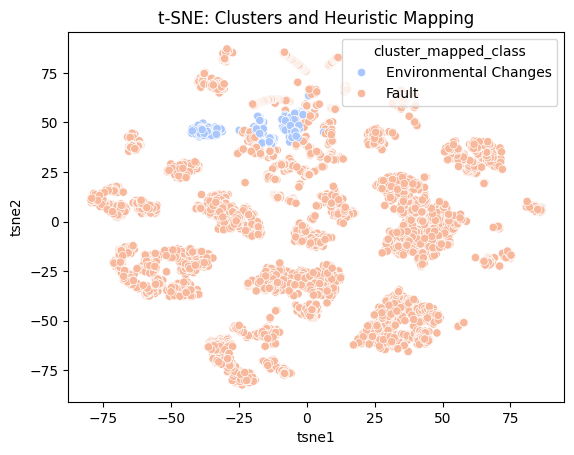

In [367]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=30, random_state=0)
tsne_proj = tsne.fit_transform(anomalous_data[cluster_features])
anomalous_data['tsne1'] = tsne_proj[:, 0]
anomalous_data['tsne2'] = tsne_proj[:, 1]

sns.scatterplot(data=anomalous_data, x='tsne1', y='tsne2', hue='cluster_mapped_class', palette='coolwarm')
plt.title("t-SNE: Clusters and Heuristic Mapping")
plt.show()
